### Introduction to Neural Network classification

+ A classification is where you try to classify something as one thing or another.
+ Few types of classification problems are :
    + Binary Classification
    + Multiclass Classification
    + Multilabel Classification

#### Create data to view and fit.

In [49]:
from sklearn.datasets import make_circles

In [50]:
n_samples = 1000
X,y=make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)


In [51]:
import pandas as pd

In [52]:
circles = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Visualize with a plot


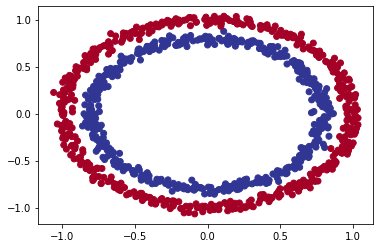

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


### Input and output shape of data


In [54]:
X.shape, y.shape

((1000, 2), (1000,))

In [55]:
import tensorflow as tf


In [56]:
## Steps in modelling

## Creare a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2664 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 3.7458 - accuracy: 0.4670
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7846 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7168 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.4960


In [57]:
## Let's train for long
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [58]:
X[0].shape

(2,)

In [59]:
# # Set the random seed
# tf.random.set_seed(42)

# model_2 = tf.keras.Sequential(
#     tf.keras.layers.Dense(1),
#     tf.keras.layers.Dense(1)
# )

# model_2.compile(
#     loss=tf.keras.losses.BinaryCrossentropy(),
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=['accuracy']
# )

# model_2.fit(X, y, epochs=100, verbose=0)


### Improving a model

+ Create a model - Add more layers | Increase number of hidden layers

+ Compiling a model - Choose a different optimization function(Adam) | 
+ Fitting a model - Fit our model for longer


In [60]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)




In [61]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5100


[0.6972905397415161, 0.5099999904632568]

Create a mesh-grid of different X Values
+ Plot prediction as well as line between different zones

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[(xx.ravel(), yy.ravel())]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print('Doing multi-class')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
Doing binary classification


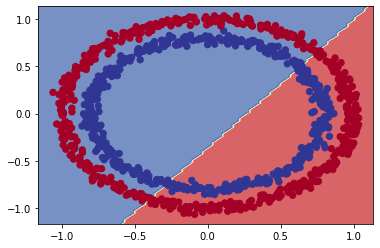

In [64]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [65]:
tf.random.set_seed(42)

x_reg = tf.range(0,1000,5)
y_reg = tf.range(100,1100,5)
x_reg_train = x_reg[:150]
x_reg_test = x_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [69]:
x_reg_train.shape

TensorShape([150])

In [67]:
# model_3.fit(x_reg_train,y_reg_train,epochs=100)

In [70]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 530.4256 - mae: 530.4256
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 408.9380 - mae: 408.9380
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 292.8521 - mae: 292.8521
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 172.8369 - mae: 172.8369
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 61.0395 - mae: 61.0395
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 80.3868 - mae: 80.3868
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 83.9116 - mae: 83.9116
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 52.6458 - mae: 52.6458
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.2903 - mae: 49.2903
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 49.5652 - mae: 49.5652
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


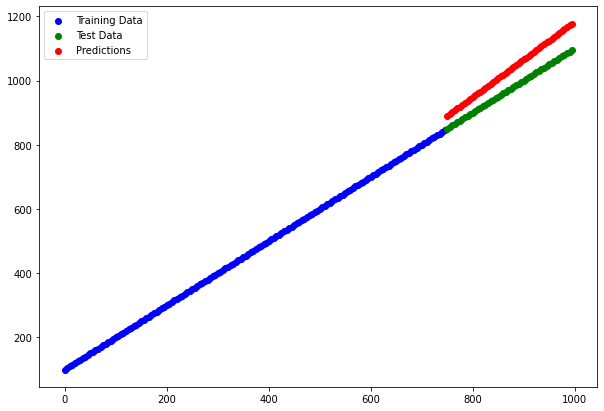

In [71]:
y_reg_pred = model_3.predict(x_reg_test)


plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(x_reg_test,y_reg_pred,c='r',label="Predictions")
plt.legend();


 Classification model fails because of Non-linearity | 